In [1]:
%load_ext autoreload
%autoreload 2

In [16]:
import pandas as pd
import pyarrow.parquet as pq
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [4]:
temp_df = pq.read_pandas('data/select_train.parquet').to_pandas()

In [9]:
temp_df.head()

,3,4,5,9,10,11,22,32,33,49,...,8660,8670,8677,8683,8691,8692,8693,8697,8701,8702
0,-0.211740,-0.384987,-0.100783,-1.188774,-1.096103,-0.391109,0.306919,-0.003271,-1.824760,0.716257,...,-0.475236,-0.736016,-0.013902,0.036273,-0.160775,-1.044402,-1.271012,0.723036,-0.007980,0.266475
1,-0.211543,-0.578038,-0.102015,-1.392195,-1.321859,-0.384617,0.252445,-0.003164,-1.605343,0.711030,...,-0.670370,-0.750925,0.240471,0.036372,-0.091342,-1.274551,-1.445510,0.722858,-0.292501,0.058417
2,-0.211339,-0.787855,-0.104346,-1.612740,-1.566432,-0.378777,0.188749,-0.002962,-1.343991,0.703045,...,-0.882899,-0.763931,0.568867,0.036471,-0.013329,-1.527187,-1.637762,0.722815,-0.603849,-0.173192
3,-0.211141,-0.933447,-0.105631,-1.757751,-1.727186,-0.372088,0.133060,-0.002846,-1.157403,0.696062,...,-1.028727,-0.777860,0.744188,0.036570,0.042439,-1.694708,-1.761830,0.722552,-0.834873,-0.337998
4,-0.210951,-1.005473,-0.105475,-1.816633,-1.792452,-0.364280,0.088451,-0.002845,-1.050809,0.690744,...,-1.098147,-0.793178,0.759168,0.036669,0.069730,-1.766179,-1.808947,0.722006,-0.971409,-0.423584


In [6]:
transposed_data = temp_df.T

In [7]:
transposed_data.head()

,0,1,2,3,4,5,6,7,8,9,...,499990,499991,499992,499993,499994,499995,499996,499997,499998,499999
3,-0.211740,-0.211543,-0.211339,-0.211141,-0.210951,-0.210760,-0.210572,-0.210382,-0.210191,-0.210003,...,0.204132,0.204460,0.204557,0.205803,0.207900,0.208969,0.209028,0.208796,0.207815,0.207561
4,-0.384987,-0.578038,-0.787855,-0.933447,-1.005473,-1.045467,-1.029851,-1.002459,-0.965587,-0.875948,...,-0.142485,-0.135732,-0.130185,-0.124781,-0.119986,-0.113802,-0.105989,-0.097860,-0.088874,-0.079921
5,-0.100783,-0.102015,-0.104346,-0.105631,-0.105475,-0.106020,-0.106732,-0.107376,-0.108208,-0.108956,...,-0.011878,-0.007040,-0.001565,0.000219,-0.000838,0.002623,0.010644,0.020216,0.033157,0.044011
9,-1.188774,-1.392195,-1.612740,-1.757751,-1.816633,-1.836507,-1.790384,-1.728676,-1.653920,-1.516423,...,1.591202,1.553125,1.494396,1.328984,1.071671,0.872847,0.732533,0.586271,0.470336,0.271899
10,-1.096103,-1.321859,-1.566432,-1.727186,-1.792452,-1.814268,-1.762754,-1.693883,-1.610447,-1.457343,...,0.555071,0.568038,0.581443,0.594968,0.608677,0.623197,0.638540,0.654451,0.671087,0.688007


In [20]:
covar_matrix = PCA(n_components = 500)
covar_matrix.fit(transposed_data)

PCA(copy=True, iterated_power='auto', n_components=500, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [21]:
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([ 2.5,  4.8,  7. ,  8.9, 10.5, 12. , 13.5, 14.8, 16. , 17.1, 18.2,
       19.3, 20.2, 21. , 21.8, 22.6, 23.4, 24.2, 24.9, 25.6, 26.3, 26.9,
       27.5, 28.1, 28.7, 29.3, 29.9, 30.5, 31. , 31.5, 32. , 32.5, 33. ,
       33.5, 34. , 34.5, 35. , 35.4, 35.8, 36.2, 36.6, 37. , 37.4, 37.8,
       38.2, 38.6, 39. , 39.4, 39.8, 40.2, 40.6, 40.9, 41.2, 41.5, 41.8,
       42.1, 42.4, 42.7, 43. , 43.3, 43.6, 43.9, 44.2, 44.5, 44.8, 45.1,
       45.4, 45.7, 46. , 46.3, 46.6, 46.8, 47. , 47.2, 47.4, 47.6, 47.8,
       48. , 48.2, 48.4, 48.6, 48.8, 49. , 49.2, 49.4, 49.6, 49.8, 50. ,
       50.2, 50.4, 50.6, 50.8, 51. , 51.2, 51.4, 51.6, 51.8, 52. , 52.2,
       52.4, 52.6, 52.8, 53. , 53.2, 53.4, 53.6, 53.8, 54. , 54.2, 54.4,
       54.6, 54.8, 55. , 55.2, 55.4, 55.6, 55.8, 56. , 56.2, 56.4, 56.6,
       56.8, 57. , 57.2, 57.4, 57.6, 57.8, 58. , 58.2, 58.4, 58.6, 58.8,
       59. , 59.2, 59.4, 59.6, 59.8, 60. , 60.2, 60.4, 60.6, 60.8, 61. ,
       61.2, 61.4, 61.6, 61.8, 62. , 62.2, 62.4, 62

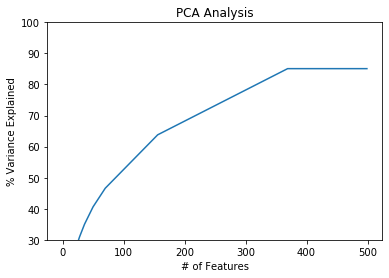

In [28]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100)

plt.plot(var)

In [39]:
np.where(var >= 85)

(array([369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381,
        382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394,
        395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407,
        408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420,
        421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433,
        434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446,
        447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459,
        460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472,
        473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485,
        486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498,
        499]),)

In [42]:
pca_train = PCA(n_components = 369)
pca_train_data = pca_train.fit_transform(transposed_data)

In [47]:
pca_train_data_df = pd.DataFrame(pca_train_data)

In [48]:
pca_train_data_df

,0,1,2,3,4,5,6,7,8,9,...,359,360,361,362,363,364,365,366,367,368
3,-6.605873,-3.808217,-9.259849,9.136361,-1.326340,-1.368591,-2.144188,4.469604,-2.899504,5.932990,...,4.619834,-0.067505,-2.420252,-3.775138,1.486276,-1.974664,5.751024,-9.508196,-9.847946,-4.945588
4,-14.281526,-6.717979,4.993926,-21.079802,13.590580,-2.132097,6.801348,-8.518201,-4.900909,6.407230,...,-1.254302,-2.987556,-6.597058,-8.111036,5.849004,4.059144,-0.637572,-9.446716,0.402754,-2.999641
5,-10.199762,13.314920,6.799339,-0.691319,11.451223,-0.995139,-16.224771,-4.882566,-2.677324,-5.265109,...,2.695040,-3.900918,0.899421,3.012100,0.990074,-5.084393,-4.459495,-2.106144,-3.062477,0.746996
9,17.262682,51.536788,20.530664,-18.187199,-10.338701,141.740547,71.472064,-614.663306,-83.902160,175.280319,...,-42.886864,119.315137,32.806233,174.165078,-52.255335,30.728791,-52.061046,3.919595,-86.553731,85.348258
10,-2.153466,-16.546493,16.952280,-0.440624,-1.453088,266.560205,43.427751,53.681151,-67.036100,319.599934,...,50.356421,-56.800535,-10.340337,-70.637262,40.585476,10.996886,55.317158,-33.746387,-41.765396,34.145216
11,-11.331470,-0.426523,18.323341,-5.170602,-12.299483,224.297041,68.243418,-524.897619,-14.214726,-138.772759,...,5.523640,6.280185,-9.731525,2.200337,27.160037,-3.909548,-11.474479,-4.074134,-6.122598,-9.543824
22,68.475513,-43.242034,-189.213695,90.884662,-8.594794,11.686038,61.595778,-396.428255,3.300330,-75.747752,...,-9.234042,-6.379581,-18.691975,4.930629,-70.123024,-20.786237,0.081337,-32.524301,-53.446594,35.361076
32,3.506051,54.947841,9.642598,-8.383300,36.265829,21.165776,-29.566240,10.400101,7.054555,-32.183358,...,0.143585,-3.945531,5.869350,1.994881,-2.441267,-6.368006,-0.654585,7.381122,1.962216,-1.743414
33,-225.501489,-374.847105,-160.589060,314.614986,-103.135930,14.244904,24.159821,12.004177,8.254534,-35.710071,...,-19.535933,8.895477,-0.130854,8.109659,13.552177,5.091640,19.635160,4.005236,-21.508125,-4.172998
49,13.473118,1.894501,7.339622,-4.856059,11.530449,7.450024,11.990701,-1.949460,-0.053008,-9.215064,...,5.701388,-5.900016,8.516237,-2.966317,-13.967322,-4.931391,-6.345871,10.122896,10.078477,3.154473


In [49]:
pca_train_data_df.to_csv('data/pca_train_data.csv')